#BIKE_DETAILS
1. What is the range of selling prices in the dataset?
2. What is the median selling price for bikes in the dataset?
3. What is the most common seller type?
4. How many bikes have driven more than 50,000 kilometers?
5. What is the average km_driven value for each ownership type?
6. What proportion of bikes are from the year 2015 or older?
7. What is the trend of missing values across the dataset?
8. What is the highest ex_showroom_price recorded, and for which bike?
9. What is the total number of bikes listed by each seller type?
10. What is the relationship between selling_price and km_driven for first-owner bike?
11. Identify and remove outliers in the km_driven column using the IQR method
12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
13. What is the average depreciation in selling price based on the bike's age (current year
14. Which bike names are priced significantly above the average price for their manufacturing year?
15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [1]:
#1
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')

min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"Range of selling prices: {price_range} (Min: {min_price}, Max: {max_price})")

FileNotFoundError: [Errno 2] No such file or directory: 'BIKE DETAILS.csv'

In [ ]:
#2
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")

In [2]:
#3
common_seller = df['seller_type'].mode()[0]
print(f"Most common seller type: {common_seller}")

NameError: name 'df' is not defined

In [ ]:
#4
high_mileage = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes with >50,000 km: {high_mileage}")

Number of bikes with >50,000 km: 170


In [ ]:
#5
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km driven by ownership type:")
print(avg_km_by_owner)

Average km driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6
current_year = pd.Timestamp.now().year
old_bikes = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion = old_bikes / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


In [ ]:
#7
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
#8
max_ex_price = df['ex_showroom_price'].max()
bike_with_max = df[df['ex_showroom_price'] == max_ex_price][['name', 'ex_showroom_price']]

print(f"Highest ex-showroom price: {max_ex_price}")
print("Bike with highest ex-showroom price:")
print(bike_with_max)

Highest ex-showroom price: 1278000.0
Bike with highest ex-showroom price:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [ ]:
#9
bikes_by_seller = df['seller_type'].value_counts()
print("Number of bikes by seller type:")
print(bikes_by_seller)

Number of bikes by seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


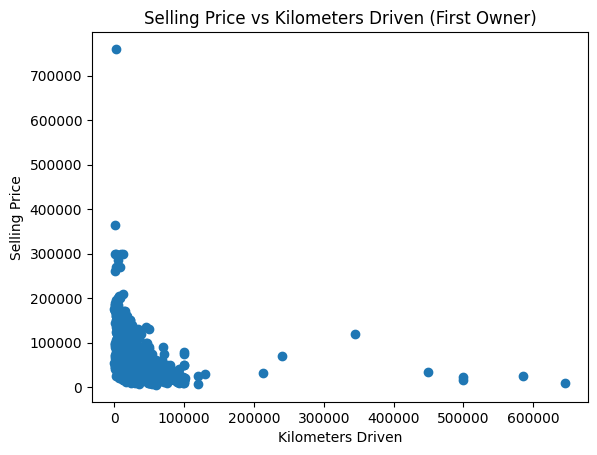

In [ ]:
#10
import matplotlib.pyplot as plt

first_owner = df[df['owner'] == '1st owner']
plt.scatter(first_owner['km_driven'], first_owner['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Kilometers Driven (First Owner)')
plt.show()

In [ ]:
#11
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Original shape: {df.shape}, New shape after removing outliers: {df_no_outliers.shape}")

Original shape: (1061, 7), New shape after removing outliers: (1022, 7)


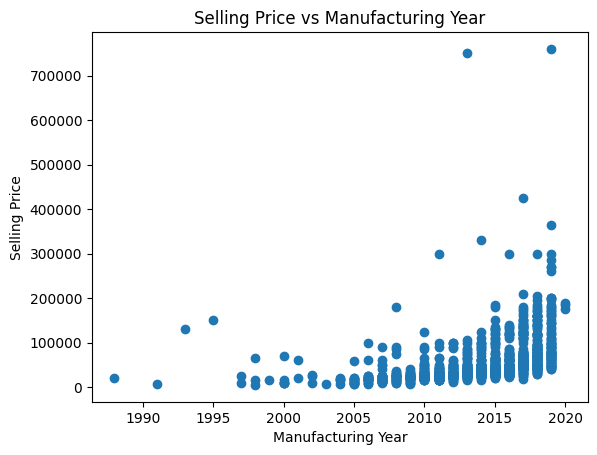

In [ ]:
#12
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Manufacturing Year')
plt.show()

In [ ]:
#13
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

avg_depreciation = df.groupby('age')['depreciation'].mean()
print("Average depreciation by bike age:")
print(avg_depreciation)

Average depreciation by bike age:
age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [ ]:
#14
import pandas as pd

df.columns = df.columns.str.lower().str.strip()

required_cols = {'year', 'selling_price', 'name'}
if not required_cols.issubset(df.columns):
    raise KeyError(f"Missing one of the required columns: {required_cols - set(df.columns)}")

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df = df.dropna(subset=['year', 'selling_price'])

yearly_avg = df.groupby('year')['selling_price'].mean().sort_index()
df['yearly_avg'] = df['year'].map(yearly_avg)

df = df.dropna(subset=['yearly_avg'])

df['price_ratio'] = df['selling_price'] / df['yearly_avg']

high_priced = df[df['price_ratio'] > 1.5].copy()
high_priced = high_priced[['name', 'year', 'selling_price', 'yearly_avg', 'price_ratio']]
high_priced = high_priced.sort_values('price_ratio', ascending=False)

print("Bikes priced significantly above their year's average:")
print(high_priced)


Bikes priced significantly above their year's average:
                               name  year  selling_price     yearly_avg  \
134      Harley-Davidson Street Bob  2013         750000   51136.986301   
860  Kawasaki Ninja 650 [2018-2019]  2011         300000   35655.721311   
311      Harley-Davidson Street 750  2014         330000   48668.131868   
295                 Suzuki GSX S750  2019         760000  119689.511628   
289  Kawasaki Ninja 650 [2018-2019]  2017         425000   78894.736842   
..                              ...   ...            ...            ...   
361   Royal Enfield Thunderbird 350  2017         120000   78894.736842   
849       Royal Enfield Classic 350  2017         120000   78894.736842   
355   Royal Enfield Thunderbird 350  2017         120000   78894.736842   
23                    Jawa Standard  2019         180000  119689.511628   
651                      KTM RC 200  2019         180000  119689.511628   

     price_ratio  
134    14.666488  
860   

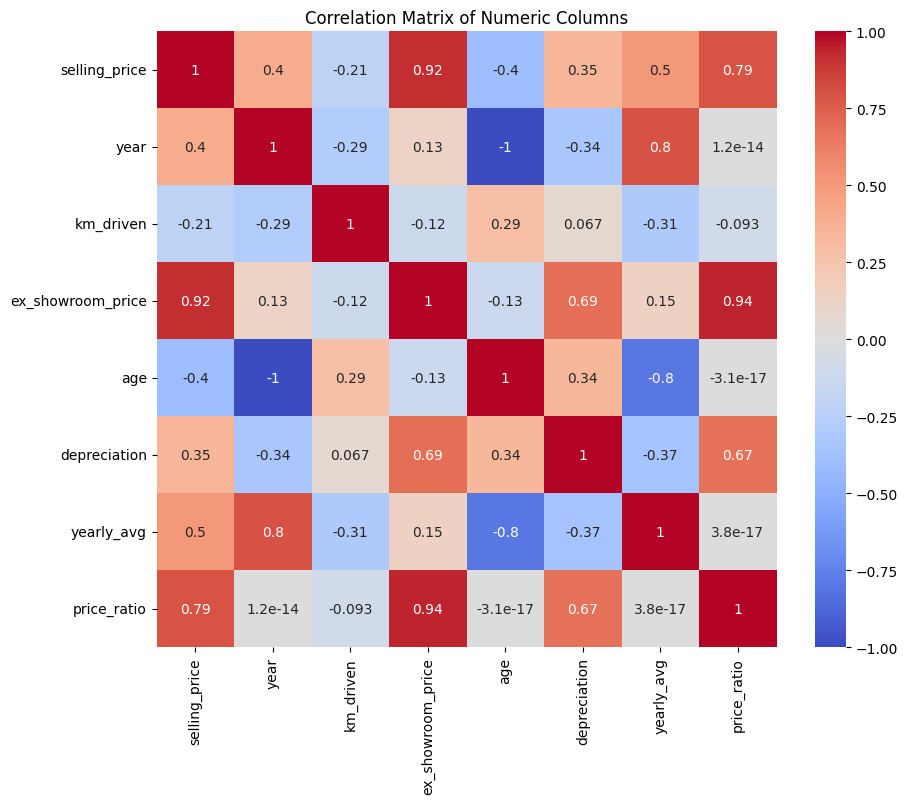

In [ ]:
#15
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

#CAR_SALES
use the dataset and give the python codes of the following questions:

1. What is the average selling price of cars for each dealer, and how does it compare across different dealer?
2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
3. What is the distribution of car prices for each transmission type, and how do the
4. What is the distribution of car prices across different regions?
5. What is the distribution of cars based on body styles?
6. How does the average selling price of cars vary by customer gender and annual income?
7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
8. How does the average car price differ between cars with different engine sizes?
9. How do car prices vary based on the customer’s annual income bracket?
10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
12. Is there any seasonal trend in car sales based on the date of sale?
13. How does the car price distribution change when considering different combinations of body style and transmission type?
14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
15. How does the average car price vary across different car models and engine types?



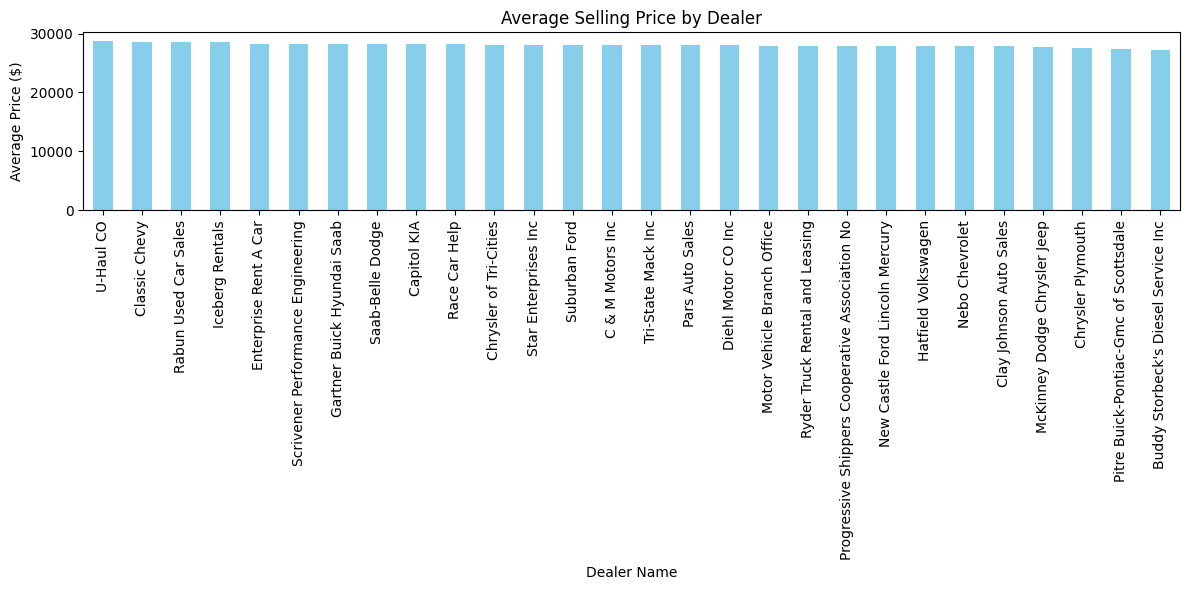

In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Car Sale.csv')

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_price_by_dealer.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

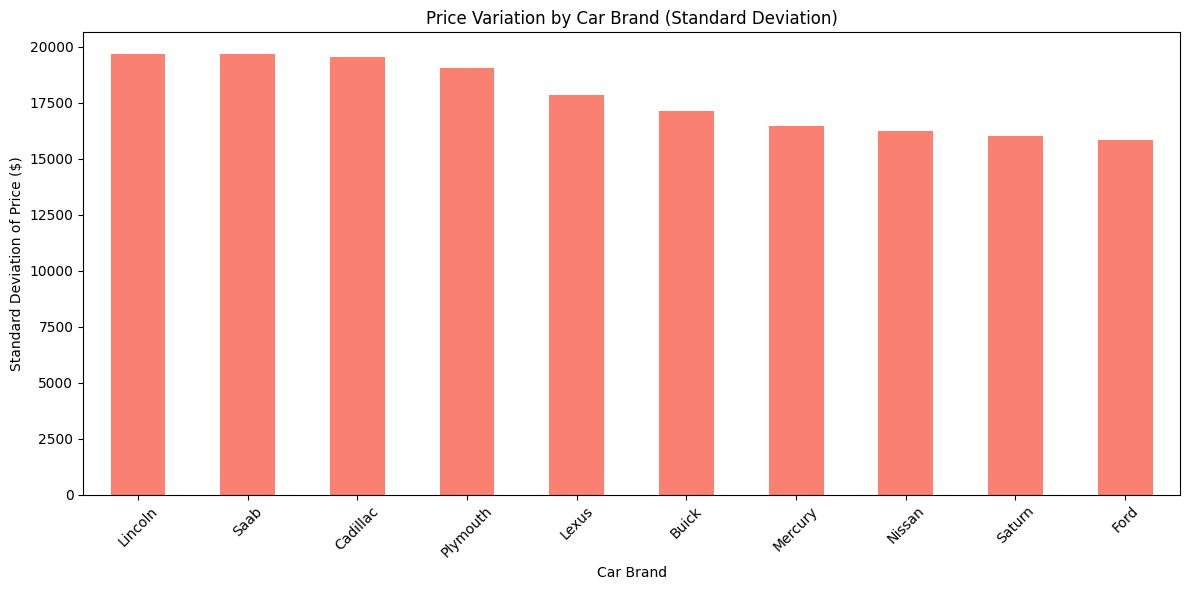

In [ ]:
#2
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
price_variation.head(10).plot(kind='bar', color='salmon')
plt.title('Price Variation by Car Brand (Standard Deviation)')
plt.xlabel('Car Brand')
plt.ylabel('Standard Deviation of Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

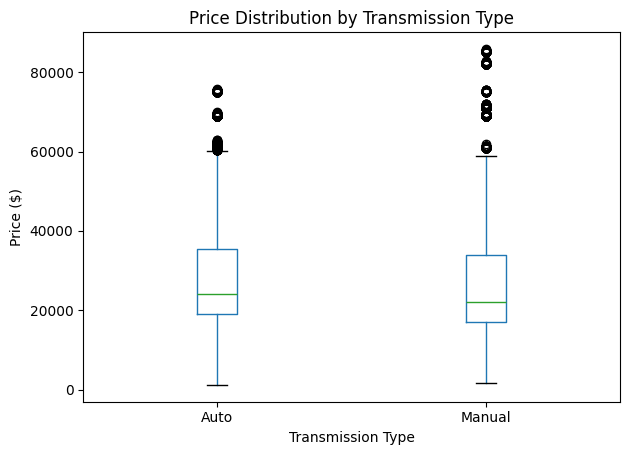

In [ ]:
#3
# Boxplot of price by transmission type
plt.figure(figsize=(10, 6))
df.boxplot(column='Price ($)', by='Transmission', grid=False)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.suptitle('')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

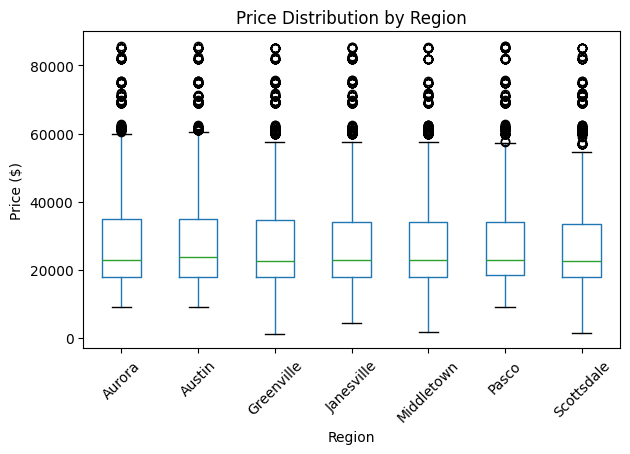

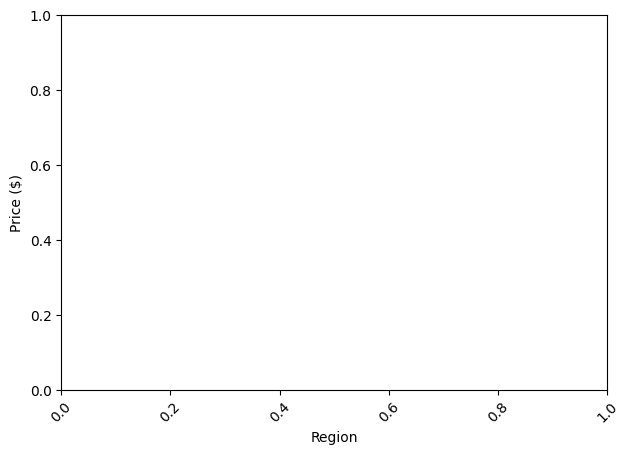

In [ ]:
#4 Boxplot of price by region
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

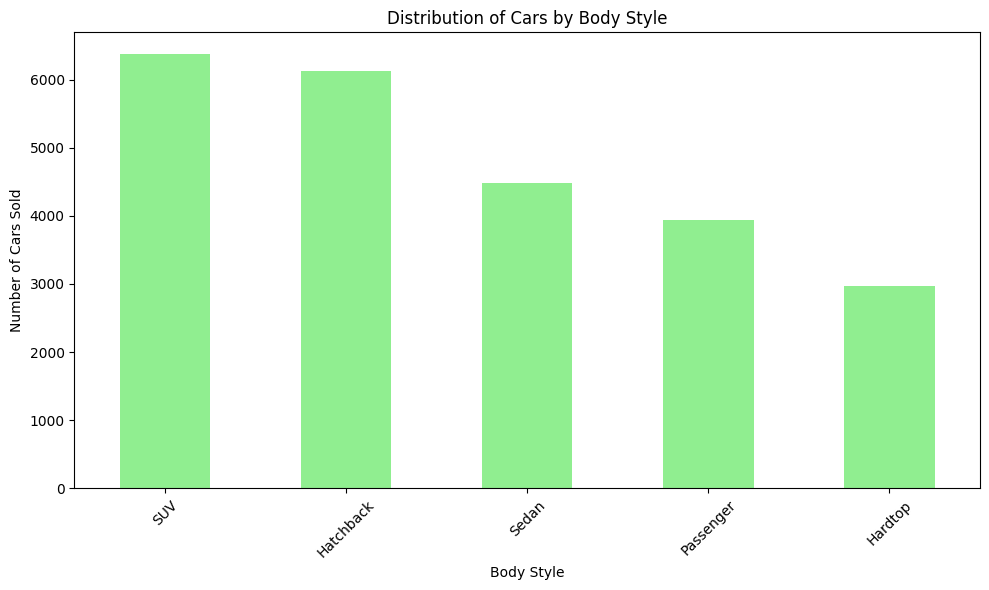

In [ ]:
#5
body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-36-09db8b3c266c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()


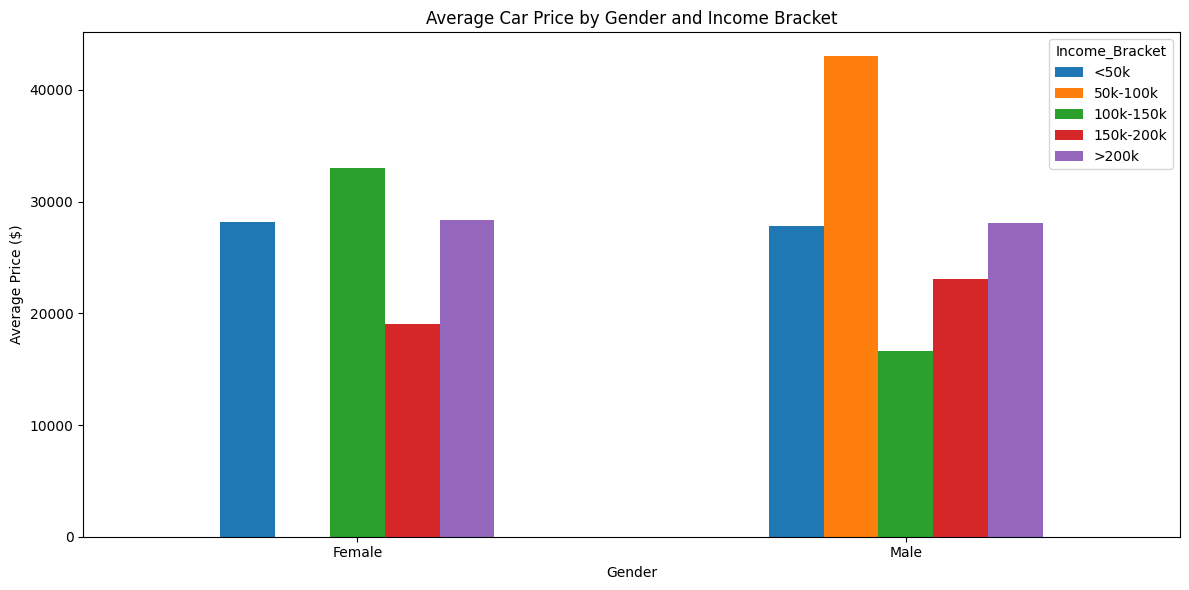

In [ ]:
#6
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)

avg_price = df.groupby(['Gender', 'Income_Bracket'])['Price ($)'].mean().unstack()

avg_price.plot(kind='bar', figsize=(12, 6))
plt.title('Average Car Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Region')

<Figure size 1200x600 with 0 Axes>

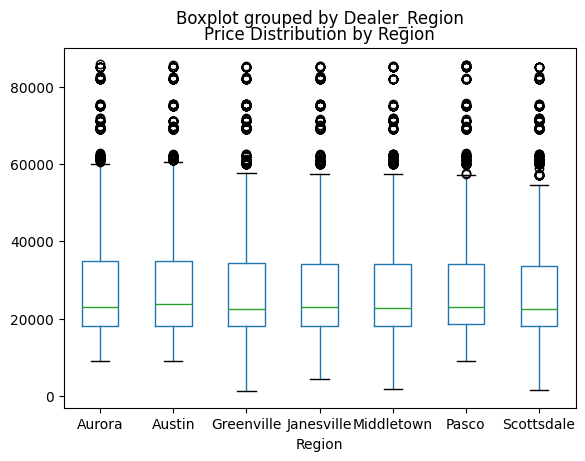

In [ ]:
#7
# Boxplot of price by region
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', grid=False)
plt.title('Price Distribution by Region')
plt.xlabel('Region')

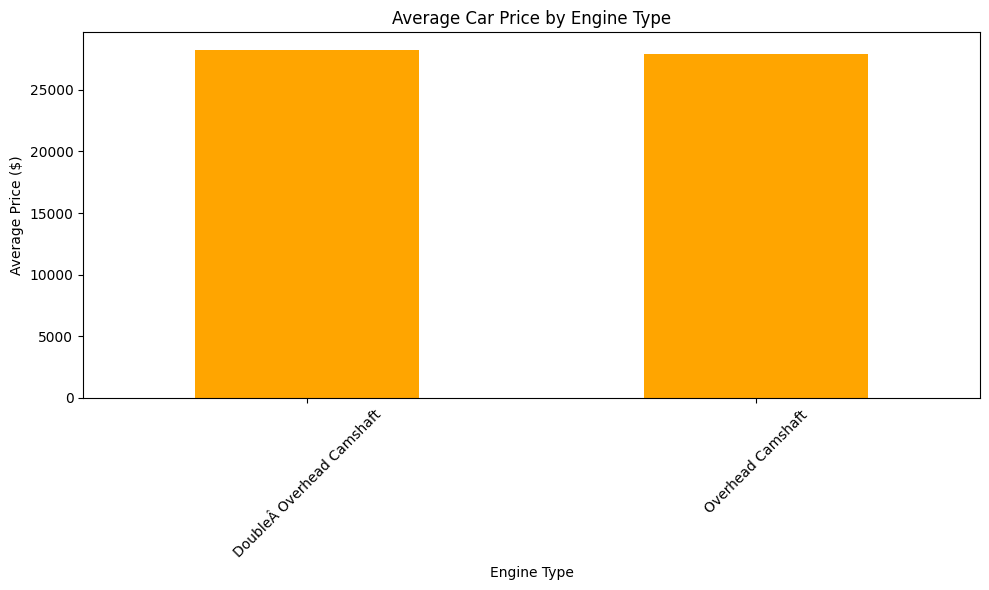

In [ ]:
#8
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_by_engine.plot(kind='bar', color='orange')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

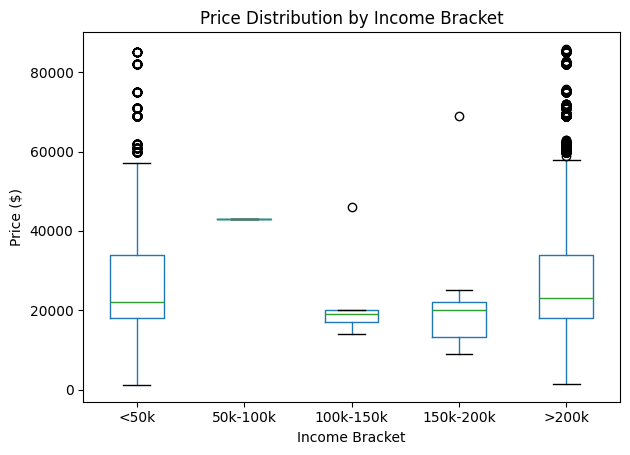

In [ ]:
#9
# Boxplot of price by income bracket
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Income_Bracket', grid=False)
plt.title('Price Distribution by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Price ($)')
plt.suptitle('')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

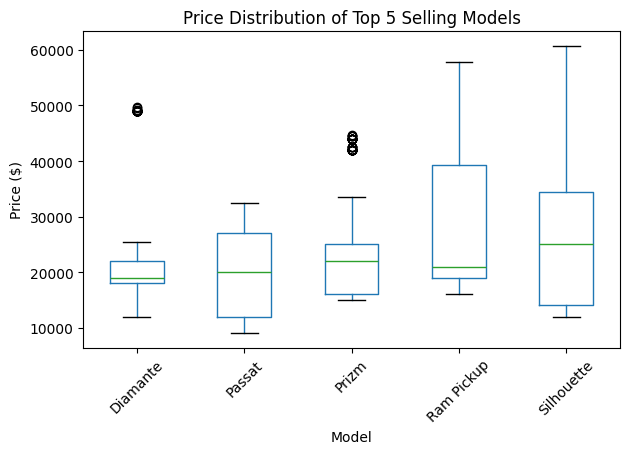

In [ ]:
#10
top_models = df['Model'].value_counts().head(5).index

top_models_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(12, 6))
top_models_df.boxplot(column='Price ($)', by='Model', grid=False)
plt.title('Price Distribution of Top 5 Selling Models')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

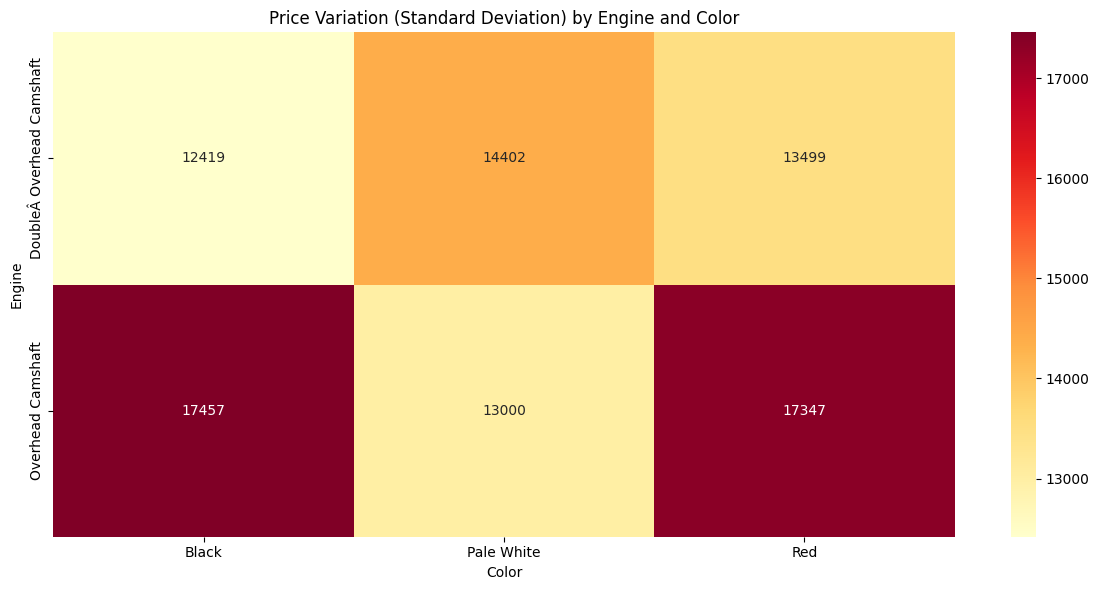

In [ ]:
#11
pivot_table = df.pivot_table(values='Price ($)', index='Engine', columns='Color', aggfunc='std')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Price Variation (Standard Deviation) by Engine and Color')
plt.tight_layout()
plt.show()

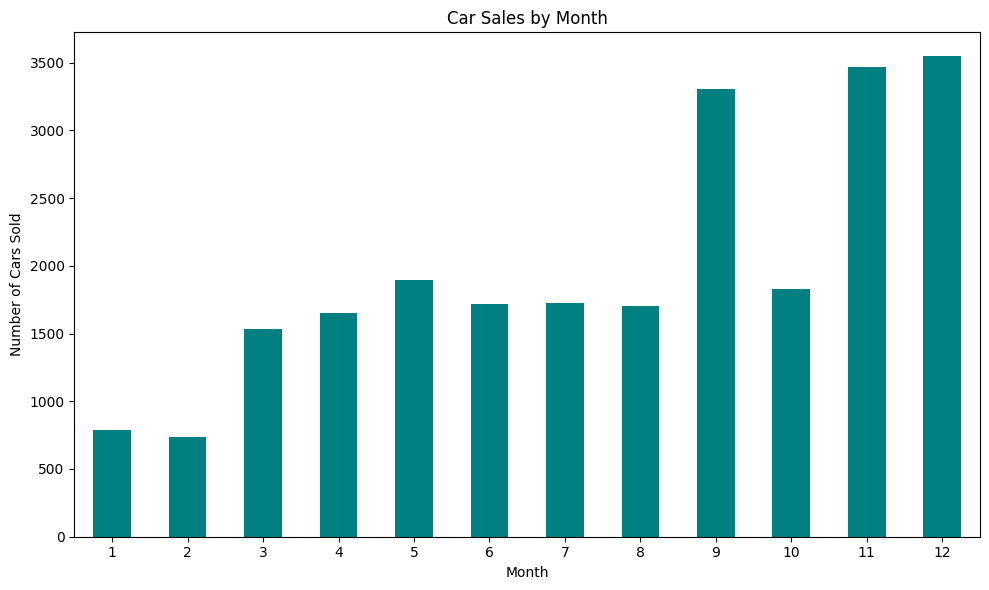

In [ ]:
#12
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

monthly_sales = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

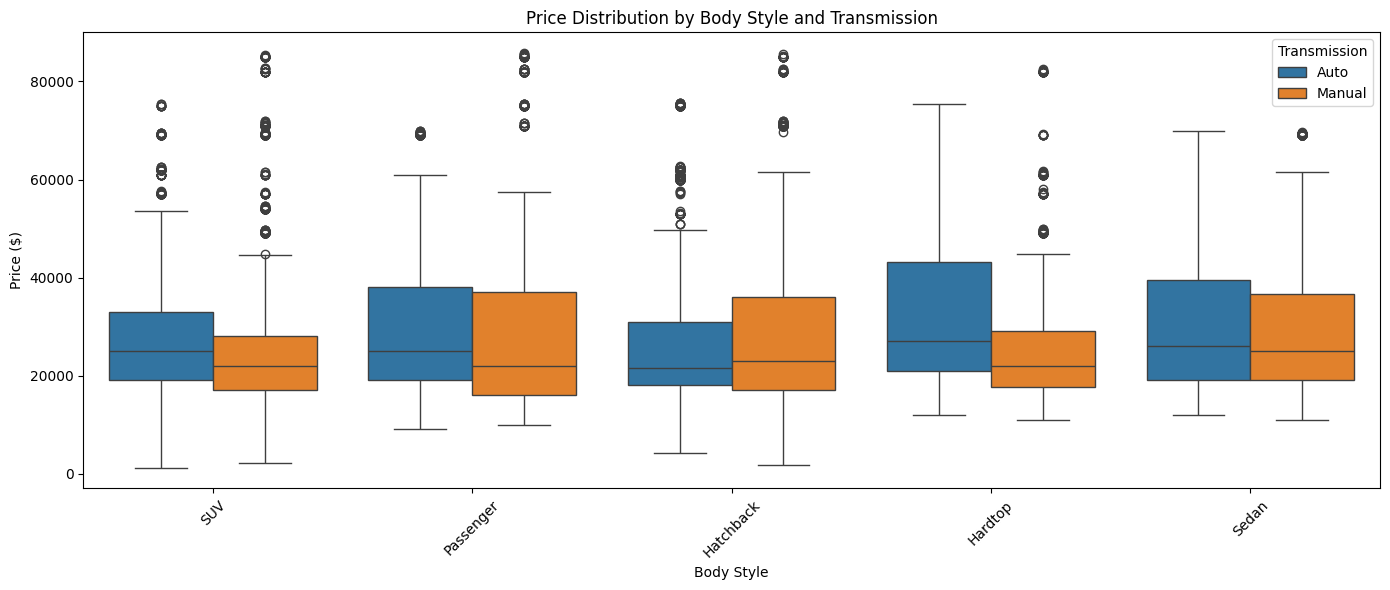

In [ ]:
#13
plt.figure(figsize=(14, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

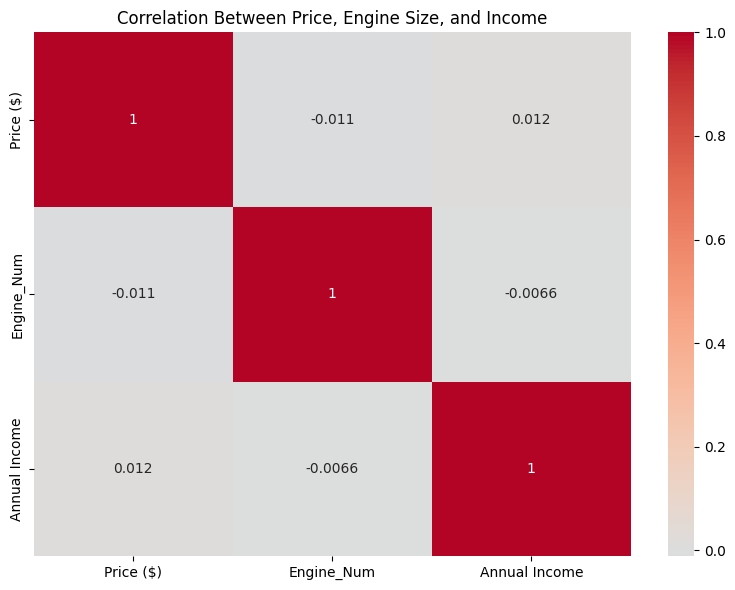

In [ ]:
#14
engine_map = {engine: i for i, engine in enumerate(df['Engine'].unique())}
df['Engine_Num'] = df['Engine'].map(engine_map)

correlation = df[['Price ($)', 'Engine_Num', 'Annual Income']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Between Price, Engine Size, and Income')
plt.tight_layout()
plt.show()

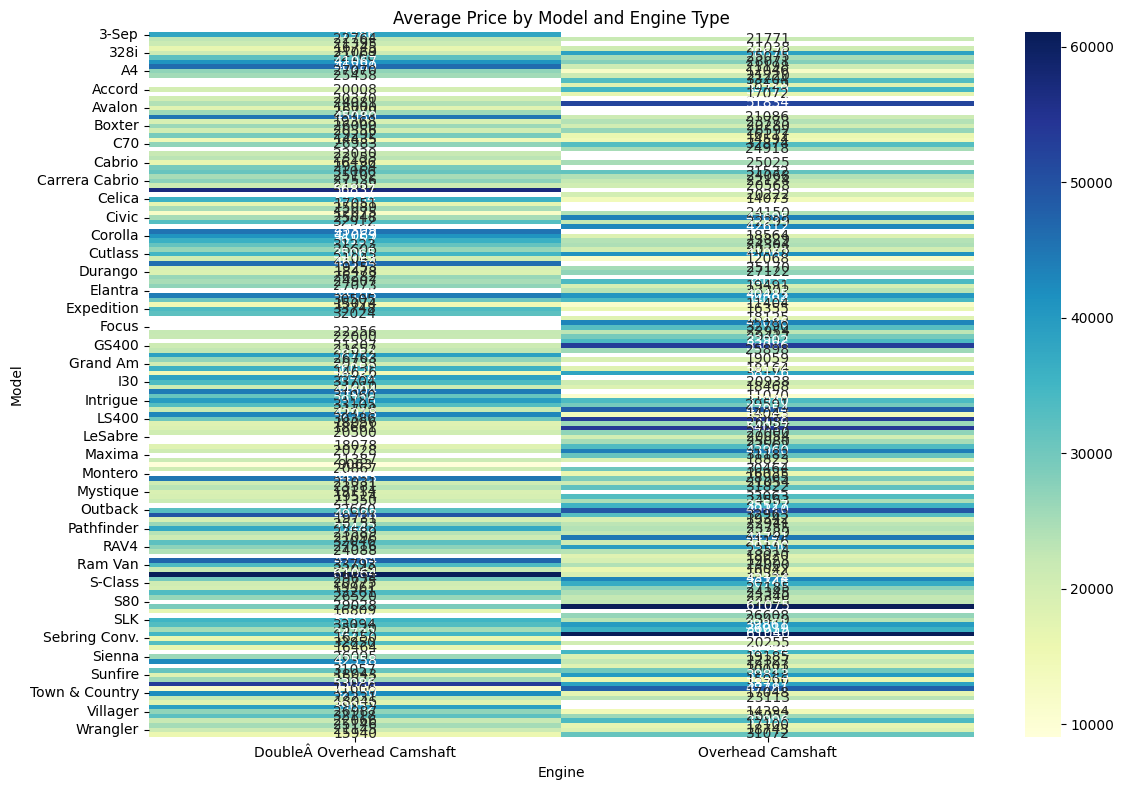

In [ ]:
#15
pivot_price = df.pivot_table(values='Price ($)', index='Model', columns='Engine', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_price, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Average Price by Model and Engine Type')
plt.tight_layout()
plt.show()

#AMAZON_DATASET
use the dataset and give the python codes of the following questions:
1. What is the average rating for each product category ?
2. What are the top rating_count products by category?
3. What is the distribution of discounted prices vs. actual prices?  
4. How does the average discount percentage vary across categories?  
5. What are the most popular product names ?
6. What are the most popular product keywords?  
7. What are the most popular product reviews ?
8. What is the correlation between discounted_price and rating?  
9. What are the Top 5 categories based on the highest ratings ?
10. Identify any potential areas for improvement or optimization based on the
data analysis.

In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df = df.dropna(subset=['rating', 'category'])

avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

print(avg_rating_by_category)


                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


In [ ]:
#2
top_products_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]
print(top_products_by_category[['category', 'product_name', 'rating_count']])

                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With Mic With 3.5 M...        7,222  
772   H

Text(0.5, 0, 'Discounted Price')

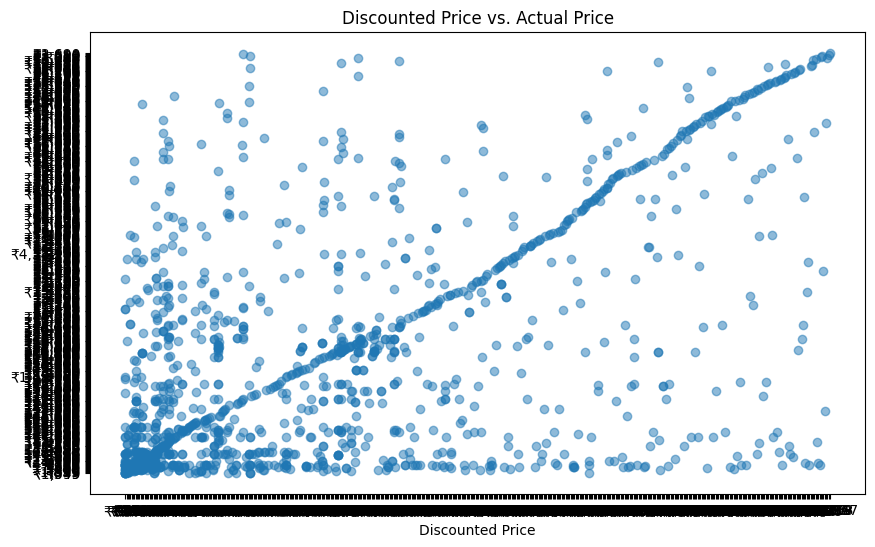

In [ ]:
#3
plt.figure(figsize=(10, 6))
plt.scatter(df['discounted_price'], df['actual_price'], alpha=0.5)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Discounted Price')

Text(0, 0.5, 'Average Discount Percentage')

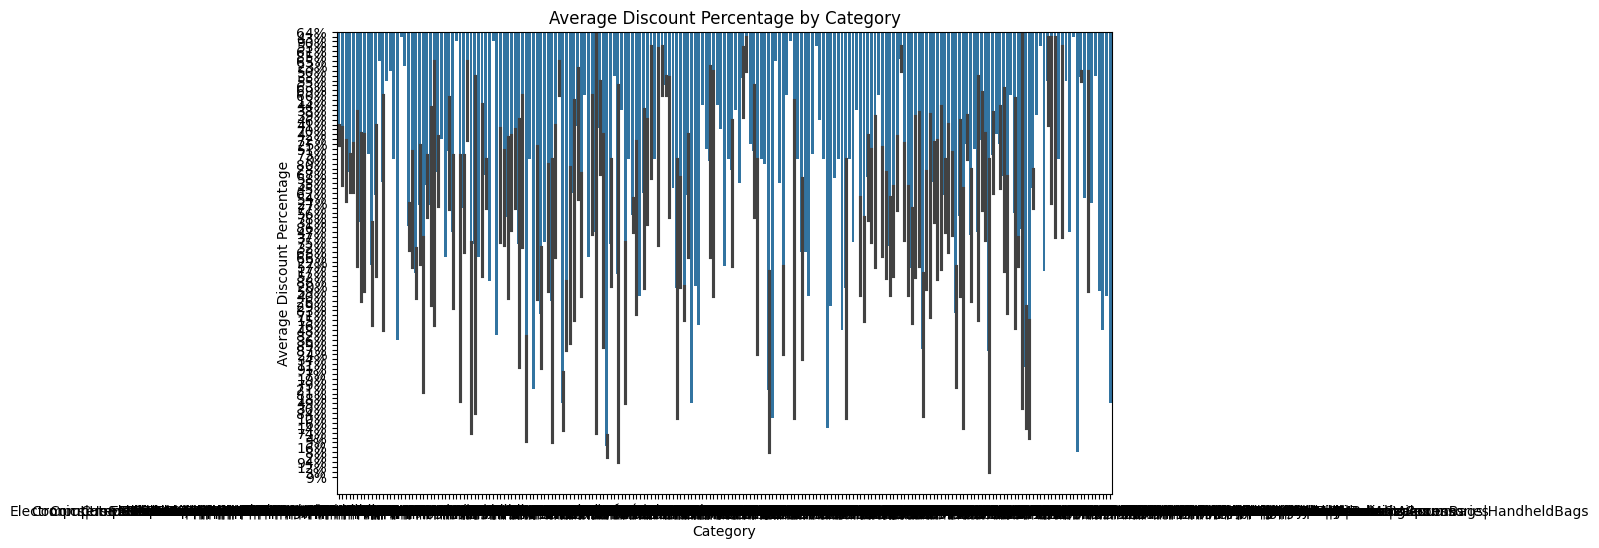

In [ ]:
#4
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='discount_percentage', data=df)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')

In [ ]:
#5
popular_products = df['product_name'].value_counts().head(5)
print(popular_products)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution          5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                   4
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black    3
Portronics Konnect L 1.2M POR-1401 Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function (White)                                                            3
MI Usb Type-C Cable Smartphone (Black)                                                                                                                             3
Name: count, dtype: int64


In [ ]:
#6
from collections import Counter
import re

keywords = []
for name in df['product_name']:
    words = re.findall(r'\w+', name.lower())
    keywords.extend(words)

keyword_counts = Counter(keywords)
print(keyword_counts.most_common(10))

[('with', 751), ('for', 674), ('black', 529), ('usb', 417), ('cable', 414), ('1', 413), ('and', 330), ('c', 289), ('3', 274), ('2', 267)]


In [ ]:
#7
popular_reviews = df['review_title'].value_counts().head(10)
print(popular_reviews)

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good pro

In [ ]:
#8
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted price and rating: {correlation}")

Correlation between discounted price and rating: 0.12033741712288548


In [ ]:
#9
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
#10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amazon.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

df = df.dropna(subset=['rating', 'category', 'discount_percentage', 'review_content'])

low_rated = df[df['rating'] < 3]
print("Common issues in low-rated products:")
print(low_rated['review_content'].value_counts().head(5))

high_discount_low_rating = df[(df['discount_percentage'] > 50) & (df['rating'] < 3)]
print("\nHigh discount but low-rated products:")
print(high_discount_low_rating[['product_name', 'discount_percentage', 'rating']])


Common issues in low-rated products:
Series([], Name: count, dtype: int64)

High discount but low-rated products:
Empty DataFrame
Columns: [product_name, discount_percentage, rating]
Index: []


#SPOTIFY_DATASET

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

2. What is the distribution of popularity among the tracks in the

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

4. Which artist has the highest number of tracks in the dataset?  Display the count of tracks for each artist using a countplot

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

7. For the top 5 most popular artists, what are their most popular tracks?  List the track name for each artist

8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

9. Does the duration of tracks vary significantly across different artists?  Explore this visually using a box plot or violin plot

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify.csv')

print("Null values in each column:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nNumber of duplicate Track IDs:", df['Track ID'].duplicated().sum())

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of duplicate rows: 27

Number of duplicate Track IDs: 27


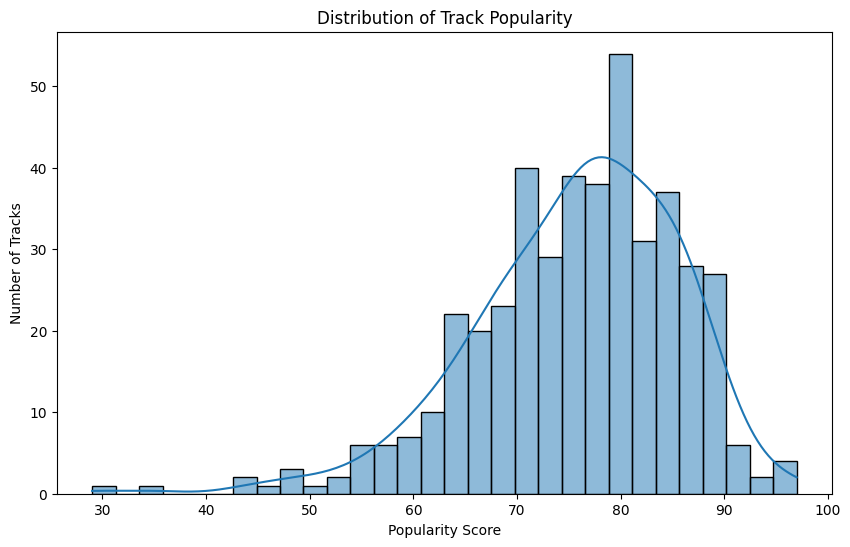

In [ ]:
#2
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()

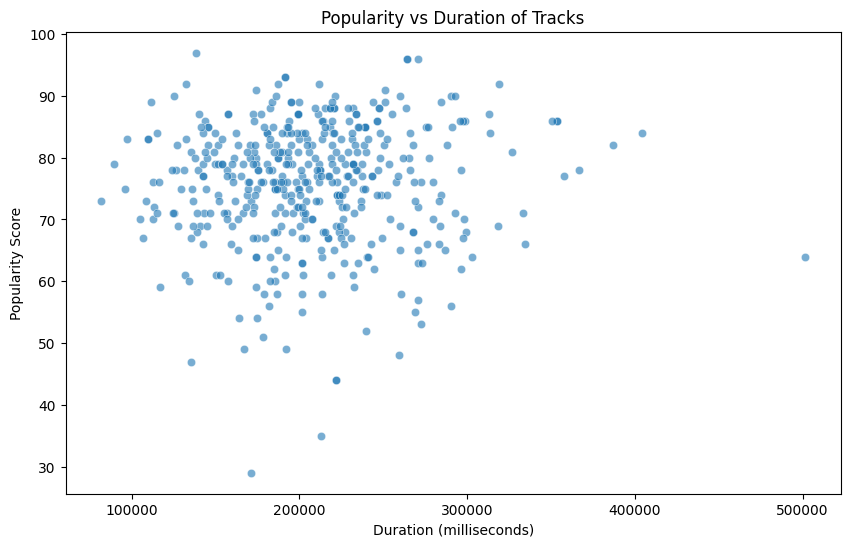

In [ ]:
#3
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Popularity Score')
plt.show()

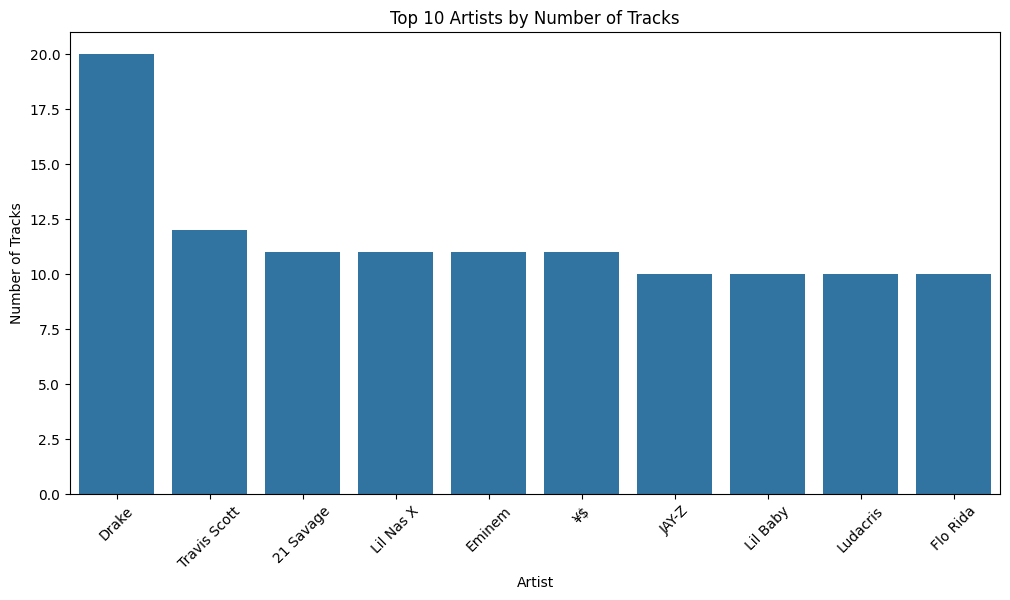

In [ ]:
#4
top_artists = df['Artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#5
least_popular = df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]
print("Top 5 least popular tracks:")
print(least_popular)

Top 5 least popular tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [ ]:
#6
top5_artists = df['Artist'].value_counts().head(5).index
top5_df = df[df['Artist'].isin(top5_artists)]

avg_popularity = top5_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

print("Average popularity for top 5 artists:")
print(avg_popularity)

Average popularity for top 5 artists:
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64


In [ ]:
#7
for artist in top5_artists:
    top_track = df[df['Artist'] == artist].nlargest(1, 'Popularity')
    print(f"{artist}: {top_track['Track Name'].values[0]} (Popularity: {top_track['Popularity'].values[0]})")

Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Travis Scott: FE!N (feat. Playboi Carti) (Popularity: 93)
21 Savage: redrum (Popularity: 96)
Lil Nas X: THATS WHAT I WANT (Popularity: 81)
Eminem: Without Me (Popularity: 90)


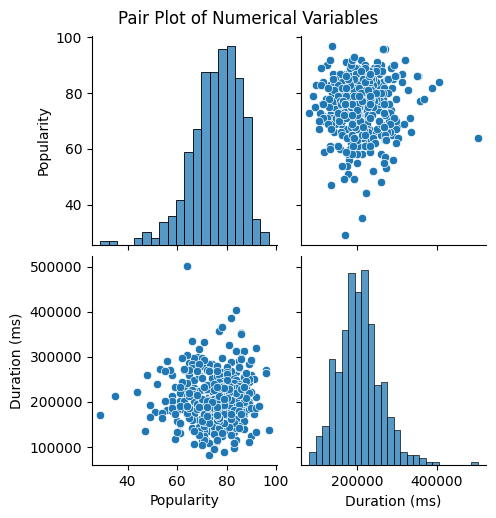

In [ ]:
#8
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

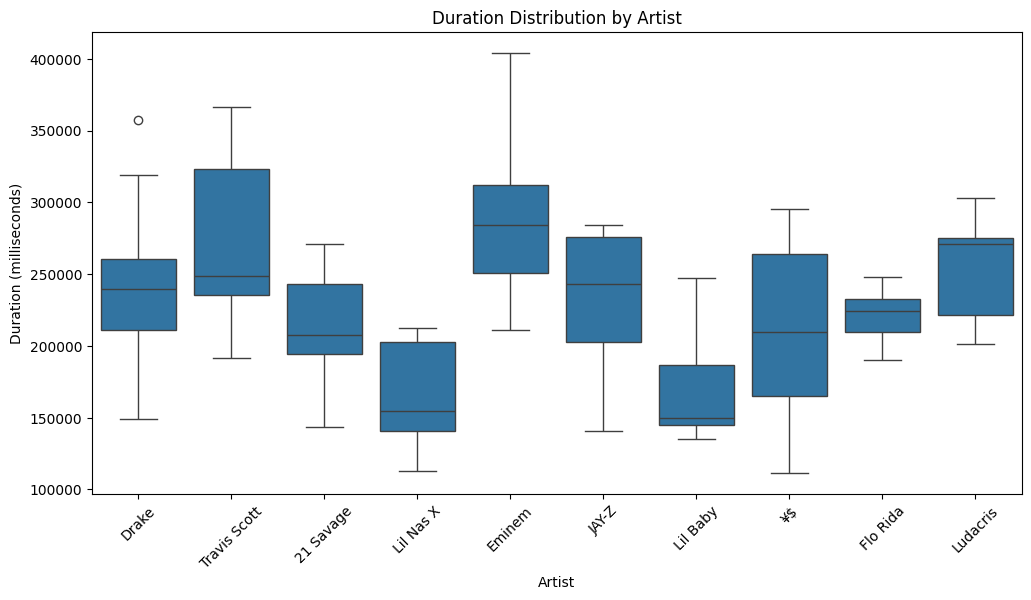

In [ ]:
#9
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['Artist'].isin(top_artists.index)],
            x='Artist', y='Duration (ms)')
plt.title('Duration Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (milliseconds)')
plt.xticks(rotation=45)
plt.show()

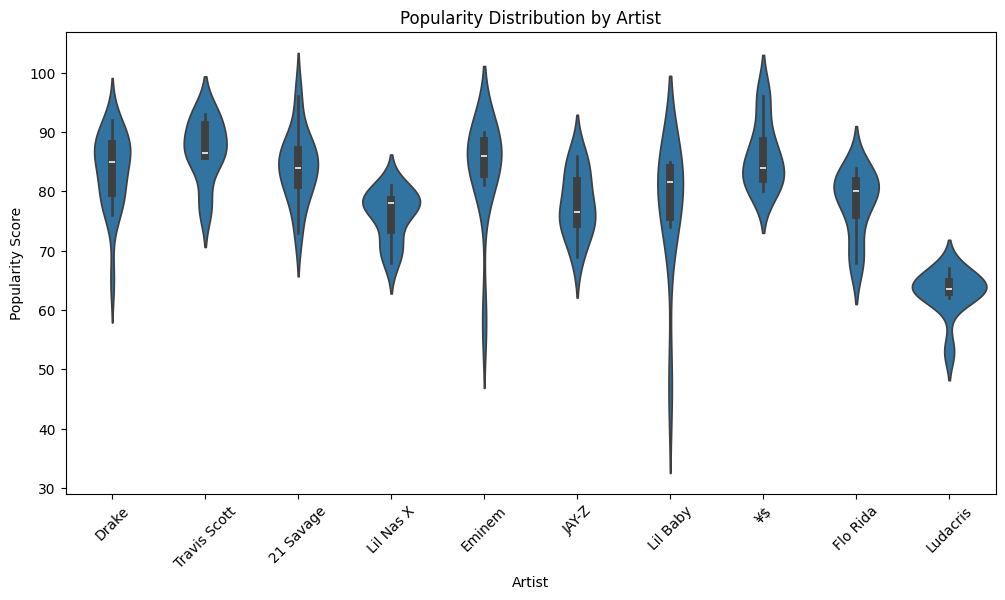

In [ ]:
#10
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Artist'].isin(top_artists.index)],
              x='Artist', y='Popularity')
plt.title('Popularity Distribution by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()